In [2]:
import pandas as pd
from scipy import stats

# 乱数の作成と再現性の確認

In [8]:
stats.uniform.rvs(size=5)

array([0.59611023, 0.00314152, 0.77637709, 0.82475327, 0.39041562])

In [10]:
stats.uniform.rvs(size=5, random_state=3)

array([0.5507979 , 0.70814782, 0.29090474, 0.51082761, 0.89294695])

In [11]:
stats.uniform.rvs(size=10, random_state=3)

array([0.5507979 , 0.70814782, 0.29090474, 0.51082761, 0.89294695,
       0.89629309, 0.12558531, 0.20724288, 0.0514672 , 0.44080984])

# サンプルデータセットの作成

In [13]:
df = pd.DataFrame()
df['Uni'] = stats.uniform.rvs(size=10000)# 一様乱数
df['Norm'] = stats.norm.rvs(loc=0, scale=1, size=10000)# 正規分布に沿った乱数
df['LogNorm'] = stats.lognorm.rvs(loc=0, s=1, size=10000)# 対数正規分布に沿った乱数
df

,Uni,Norm,LogNorm
0,0.063628,-0.205120,0.377529
1,0.197405,0.187805,1.995149
2,0.967671,-0.722015,2.382730
3,0.084757,0.473928,0.639793
4,0.938621,-0.433846,0.237046
...,...,...,...
9995,0.890535,0.304332,1.682917
9996,0.214159,0.608880,0.472010
9997,0.386110,-0.158959,6.181747
9998,0.860887,0.006933,3.841595


# 分布を確認

<AxesSubplot:>

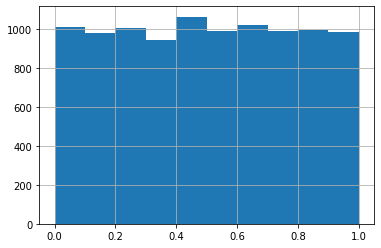

In [15]:
df['Uni'].hist()

<AxesSubplot:>

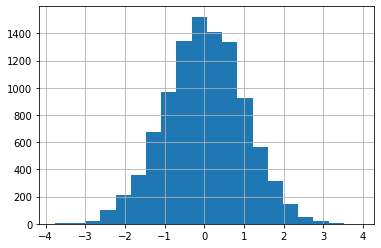

In [17]:
df['Norm'].hist(bins=20)

<AxesSubplot:>

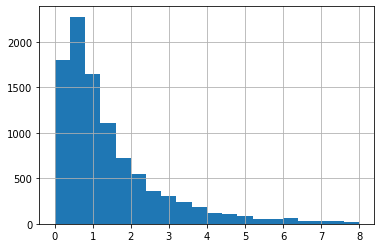

In [19]:
df['LogNorm'].hist(bins=20, range=(0,8))